In [16]:
import os
import pandas as pd
from urllib.parse import parse_qs
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [17]:
type_exp = ["placeholder", "randomExample", "dynamic-r2"]
benchmarks = ["libraries", "cedar", "dafnyVMC"]
# Initialize an array to store the cumulative successes for all indices
successes_data = {}
overall_data = {}
for benchmark in benchmarks:
    for method in type_exp:
        df = pd.DataFrame()
        for i in range(58):
            if os.path.exists(
                f"../results_llm/tmp_{benchmark}/output_{method}_{benchmark}_{i}.csv"
            ):
                # print(f"Reading file {i}")
                df_temp = pd.read_csv(
                    f"../results_llm/tmp_{benchmark}/output_{method}_{benchmark}_{i}.csv"
                )
                df_temp["Index"] = i
                df = pd.concat([df, df_temp], ignore_index=True)
        print(df.shape)
        overall_data[(method, benchmark)] = df

        cumulative_successes = [0 * 10]
        # Iterate over the range of tries
        for try_number in range(10):
            # Get the successes for the current try and all previous tries
            successes = df[
                (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
            ]
            # Count the number of unique indices that were successful
            cumulative_successes.append(successes["Index"].nunique())

            successes_data[(method, benchmark)] = cumulative_successes

normalized_cumulative_success = {}

total_successes = {}
total_task = 0
seen = []
for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = overall_data[(method, benchmark)]["Index"].nunique()
    print(total_indices)
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]
    if benchmark not in seen:
        total_task += total_indices
        seen.append(benchmark)
    if method not in total_successes:
        total_successes[method] = cumulative_successes
    else:
        total_successes[method] = [
            x + y for x, y in zip(total_successes[method], cumulative_successes)
        ]
    print(
        f"normalized_cumulative_success[{method}, {benchmark}] = {normalized_cumulative_success[(method, benchmark)]}"
    )


print(total_successes)
print(total_task)
for method in total_successes:
    total_successes[method] = [100.0 * x / total_task for x in total_successes[method]]
print(total_successes)

(364, 24)


/tmp/ipykernel_3880655/2362469647.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


(317, 24)


/tmp/ipykernel_3880655/2362469647.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


(265, 24)
(417, 24)
(353, 24)
(330, 24)
(268, 24)
(208, 24)
(195, 24)
58
normalized_cumulative_success[placeholder, libraries] = [0.0, 25.862068965517242, 37.93103448275862, 39.6551724137931, 39.6551724137931, 39.6551724137931, 43.10344827586207, 48.275862068965516, 48.275862068965516, 50.0, 50.0]
57
normalized_cumulative_success[randomExample, libraries] = [0.0, 42.10526315789474, 45.6140350877193, 49.12280701754386, 50.87719298245614, 50.87719298245614, 50.87719298245614, 50.87719298245614, 50.87719298245614, 52.63157894736842, 54.3859649122807]
57
normalized_cumulative_success[dynamic-r2, libraries] = [0.0, 50.87719298245614, 56.14035087719298, 59.64912280701754, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982]
54
normalized_cumulative_success[placeholder, cedar] = [0.0, 12.962962962962964, 18.51851851851852, 22.22222222222222, 24.074074074074073, 25.925925925925927, 29.62962962962963, 31.48148148148

In [18]:
print(normalized_cumulative_success)

{('placeholder', 'libraries'): [0.0, 25.862068965517242, 37.93103448275862, 39.6551724137931, 39.6551724137931, 39.6551724137931, 43.10344827586207, 48.275862068965516, 48.275862068965516, 50.0, 50.0], ('randomExample', 'libraries'): [0.0, 42.10526315789474, 45.6140350877193, 49.12280701754386, 50.87719298245614, 50.87719298245614, 50.87719298245614, 50.87719298245614, 50.87719298245614, 52.63157894736842, 54.3859649122807], ('dynamic-r2', 'libraries'): [0.0, 50.87719298245614, 56.14035087719298, 59.64912280701754, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982, 61.40350877192982], ('placeholder', 'cedar'): [0.0, 12.962962962962964, 18.51851851851852, 22.22222222222222, 24.074074074074073, 25.925925925925927, 29.62962962962963, 31.48148148148148, 31.48148148148148, 31.48148148148148, 31.48148148148148], ('randomExample', 'cedar'): [0.0, 29.62962962962963, 33.333333333333336, 38.888888888888886, 40.74074074074074, 40.7407

{'dynamic-r2': 'c', 'placeholder': 'g', 'randomExample': 'm'}


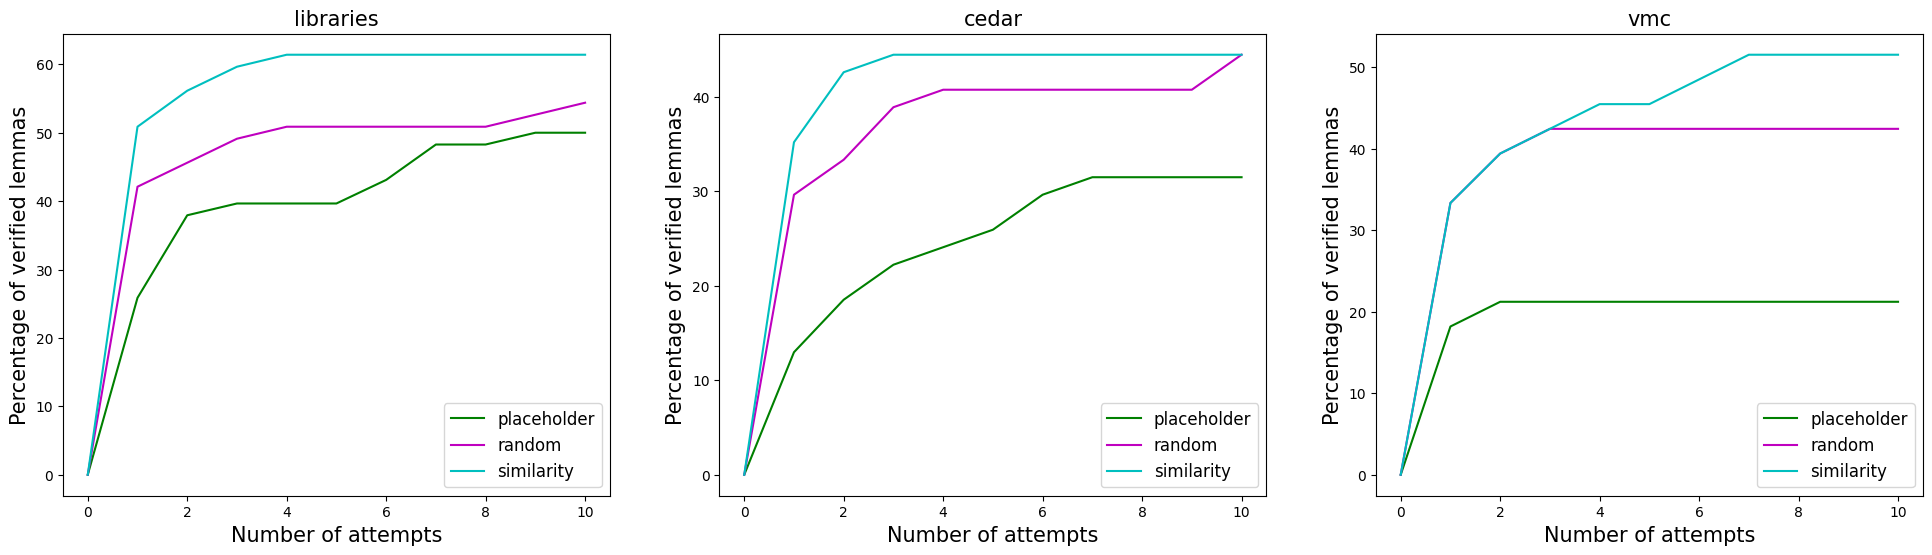

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
colors = ["c", "g", "m", "c", "m", "y", "k"]
color_map = {
    method: colors[i % len(colors)]
    for i, method in enumerate(["dynamic-r2", "placeholder", "randomExample"])
}
print(color_map)
i = 0
for benchmark in benchmarks:
    # axs[i](figsize=(10, 6))
    for method in type_exp:
        data = normalized_cumulative_success[(method, benchmark)]
        method_name = method
        if method == "randomExample":
            method_name = "random"
        if method == "dynamic-r2":
            method_name = "similarity"
        axs[i].plot(data, label=method_name, color=color_map[method])
        benchmark_name = benchmark
        if benchmark == "dafnyVMC":
            benchmark_name = "vmc"
        axs[i].set_title(f"{benchmark_name}", fontsize=15)
        axs[i].set_xlabel("Number of attempts", fontsize=15)
        axs[i].legend(loc="lower right", fontsize=10)
        axs[i].set_ylabel("Percentage of verified lemmas", fontsize=15)
        # axs[i].legend()
    i += 1
plt.savefig("../fig/benchs_similarity.pdf", bbox_inches="tight")
plt.show()
# plt.figure(figsize=(10, 6))
# normalized_cumulative_success_lib = normalized_cumulative_success
# for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
#   data = normalized_cumulative_success[(method, "kfold")]
#   plt.plot(data, label=method)
# plt.title(f'Normalized Cumulative Success for {benchmark}')
# plt.xlabel('Index')
# plt.ylabel('Normalized Cumulative Success (%)')
# plt.legend()
# plt.show()

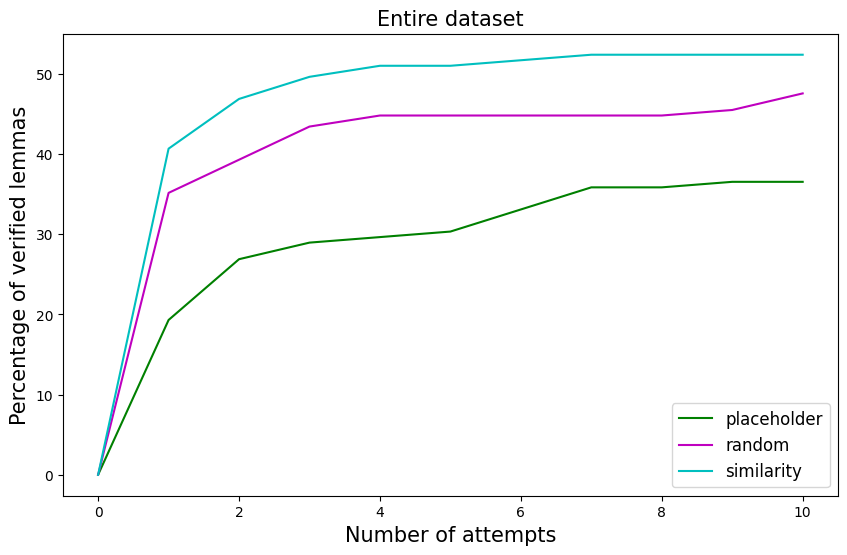

In [20]:
plt.figure(figsize=(10, 6))
for method, data in total_successes.items():
    method_name = method
    if method == "randomExample":
        method_name = "random"
    if method == "dynamic-r2":
        method_name = "similarity"
    plt.plot(data, label=method_name, color=color_map[method])
    plt.title(f"Entire dataset", fontsize=15)
    plt.xlabel("Number of attempts", fontsize=15)
    plt.ylabel("Percentage of verified lemmas", fontsize=15)
    plt.legend(loc="lower right", fontsize=10)
plt.savefig("../fig/entire_similarity.pdf", bbox_inches="tight")

plt.show()

In [21]:
type_exp = ["dynamic", "dynamic-r3", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(53):
        if os.path.exists(f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    if method == "randomExamples":
        normalized_cumulative_success[("randomExample", benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]
    else:
        normalized_cumulative_success[(method, benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]

(332, 24)
(0, 0)


KeyError: 'New Method Result'

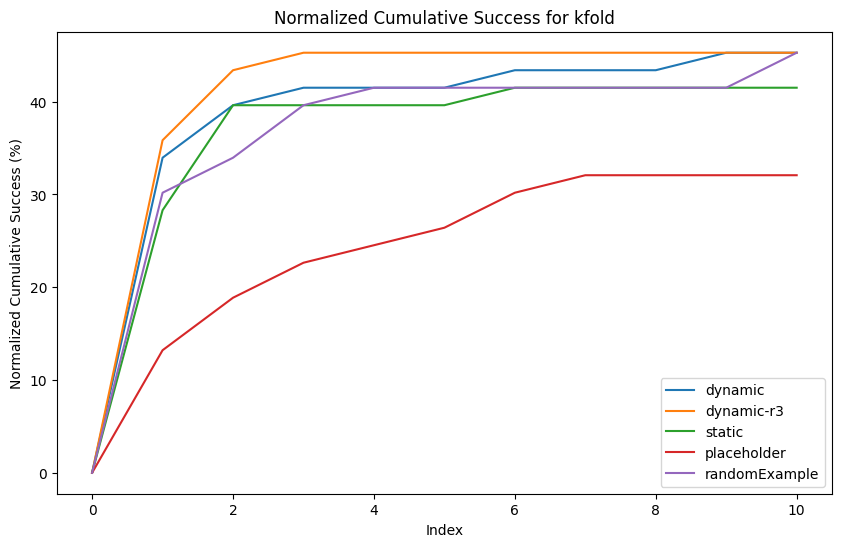

In [ ]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_cedar = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [ ]:
type_exp = ["dynamic", "dynamic-r2", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(58):
        if os.path.exists(
            f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
        ):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(method)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]

dynamic
(206, 24)
dynamic-r2
(195, 24)
static
(200, 24)
placeholder
(268, 24)
randomExample
(208, 24)


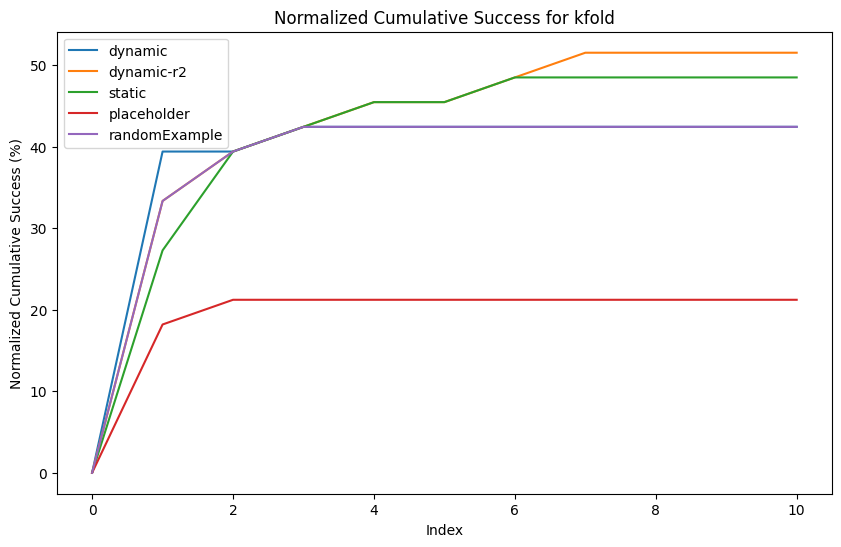

In [ ]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_dafnyVMC = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [ ]:
total_normalized_cumulative_success = {}
for (
    method,
    benchmark,
), cumulative_successes in normalized_cumulative_success_cedar.items():
    # compute the mean over the 3 benchmarks
    total_normalized_cumulative_success[method] = [
        (
            normalized_cumulative_success_lib[(method, "kfold")][i]
            + normalized_cumulative_success_cedar[(method, "kfold")][i]
            + normalized_cumulative_success_dafnyVMC[(method, "kfold")][i]
        )
        / 3
        for i in range(11)
    ]
print(total_normalized_cumulative_success)

{'dynamic': [0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044], 'static': [0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214], 'placeholder': [0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274], 'randomExample': [0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]}


[0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044]
[0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214]
[0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274]
[0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]


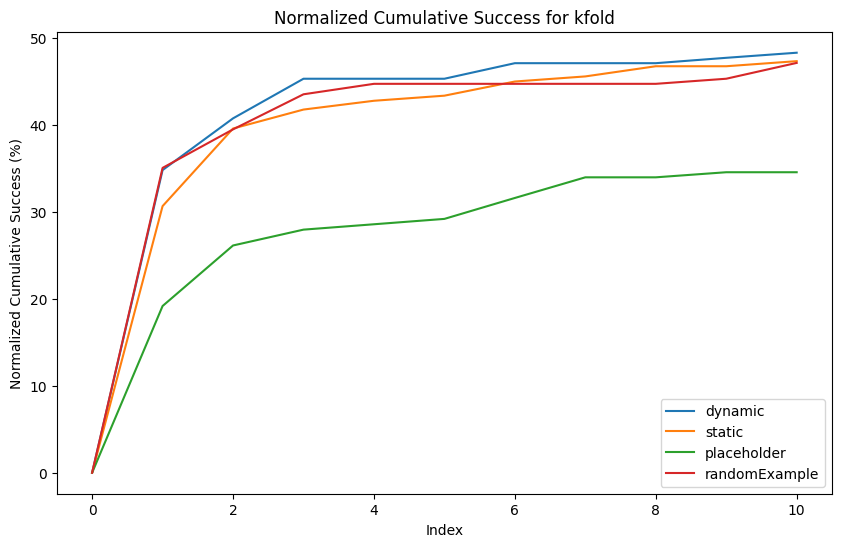

In [ ]:
plt.figure(figsize=(10, 6))
for method, cumulative_successes in total_normalized_cumulative_success.items():
    data = total_normalized_cumulative_success[method]
    print(data)
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()